# Plant Disease Detection using Logistic Regression

In [1]:
import os
print(os.getcwd())
print(os.listdir())

F:\PlantDiseasesDetection
['.ipynb_checkpoints', 'DecisionTree_PlantDisease.ipynb', 'LogisticRegression_PlantDisease.ipynb', 'Plant detection SVM.ipynb', 'Plant Disease Detection using Keras.ipynb', 'Plant Disease Detection using Keras_2.ipynb', 'PlantDisease', 'PlantVillage', 'PlantVillage-Dataset', 'Test.ipynb', 'Test2.ipynb']


In [2]:
folder = 'F:\PlantDiseasesDetection\PlantDisease'
print(os.listdir(folder))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
list_of_dir = os.listdir(folder)
list_of_dir

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [5]:
def create(location, var):
    import cv2
    import glob
    X_data = []
    files = glob.glob("F:\\PlantDiseasesDetection\\PlantDisease\\" + location + "\\*.JPG")
    for file in files[:200]:
        image = cv2.imread (file)
        image = cv2.resize(image, (64,64))
        X_data.append (image)
    print('X_data shape:', np.array(X_data).shape)
    numpy_entry = np.array(X_data).reshape(np.array(X_data).shape[0] ,-1)
    print('numpy_entry shape:', numpy_entry.shape)
    df=pd.DataFrame(data=numpy_entry[0:,0:], index=[i for i in range(numpy_entry.shape[0])], columns=['Pixel '+str(i) for i in range(numpy_entry.shape[1])])
    df['Category'] = var
    return df

In [6]:
master_df=pd.DataFrame(columns=['Pixel '+str(i) for i in range(64*64*3)])
for i in list_of_dir:
    if i.split("_")[-1] == 'healthy' :
        var = 0
    else:
        var = 1
    df = create(i,var)
    frames=[master_df , df]
    master_df = pd.concat(frames)
    print(" Done For ",i," With category Value ",var)
    print("Master Data Frame   ",master_df.shape)
    print()

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done For  Apple___Apple_scab  With category Value  1
Master Data Frame    (200, 12289)

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done For  Apple___Black_rot  With category Value  1
Master Data Frame    (400, 12289)

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done For  Apple___Cedar_apple_rust  With category Value  1
Master Data Frame    (600, 12289)

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done For  Apple___healthy  With category Value  0
Master Data Frame    (800, 12289)

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done For  Blueberry___healthy  With category Value  0
Master Data Frame    (1000, 12289)

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done For  Cherry_(including_sour)___healthy  With category Value  0
Master Data Frame    (1200, 12289)

X_data shape: (200, 64, 64, 3)
numpy_entry shape: (200, 12288)
 Done

In [7]:
master_df.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 12279,Pixel 12280,Pixel 12281,Pixel 12282,Pixel 12283,Pixel 12284,Pixel 12285,Pixel 12286,Pixel 12287,Category
0,198,165,169,196,163,167,198,165,169,200,...,132,105,121,132,105,121,135,108,124,1.0
1,175,124,131,174,123,130,176,125,132,174,...,113,77,85,113,78,85,116,80,88,1.0
2,177,135,123,175,133,121,176,134,122,176,...,142,110,111,142,110,111,138,106,107,1.0
3,222,205,214,220,203,212,211,194,203,202,...,185,172,193,189,170,190,189,173,191,1.0
4,178,145,149,182,149,153,181,148,152,178,...,116,85,94,114,83,92,113,82,91,1.0


In [8]:
master_df.tail()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 12279,Pixel 12280,Pixel 12281,Pixel 12282,Pixel 12283,Pixel 12284,Pixel 12285,Pixel 12286,Pixel 12287,Category
195,152,152,168,147,147,163,144,144,160,145,...,81,87,110,82,88,111,75,81,104,1.0
196,116,117,127,119,120,130,119,120,130,115,...,142,138,149,148,144,155,143,139,150,1.0
197,129,128,144,117,116,132,129,128,144,123,...,153,147,164,156,150,167,149,143,160,1.0
198,144,150,149,144,150,149,142,148,147,142,...,102,103,101,102,103,101,104,105,103,1.0
199,137,132,133,133,128,129,142,137,138,141,...,147,142,141,149,144,143,149,144,143,1.0


In [9]:
master_df.shape

(7552, 12289)

In [10]:
X = master_df[master_df.columns[0:-1]].to_numpy()
X.shape

(7552, 12288)

In [11]:
y = master_df[['Category']].to_numpy()
y.shape

(7552, 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
y_train = y_train.flatten()
y_test = y_test.flatten()
print(y_train.shape)
print(y_test.shape)

(6041, 12288)
(1511, 12288)
(6041,)
(1511,)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression using solver as 'liblinear' 

In [14]:
logistic_classifer1 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr', random_state = 42)
logistic_classifer1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred_train = logistic_classifer1.predict(X_train)
y_pred_test = logistic_classifer1.predict(X_test)

In [16]:
print("Training Accuracy:")
print(accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred_test))

Training Accuracy:
1.0

Test Accuracy:
0.771674387822634


In [17]:
error_matrix = confusion_matrix(y_test, y_pred_test)
print(error_matrix)

[[305 137]
 [208 861]]


### Logistic Regression using solver as 'lbfgs'  

In [18]:
logistic_classifer2 = LogisticRegression(solver = 'lbfgs', max_iter = 200, n_jobs = -1, multi_class = 'ovr', random_state = 42)
logistic_classifer2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred_train = logistic_classifer2.predict(X_train)
y_pred_test = logistic_classifer2.predict(X_test)

In [20]:
print("Training Accuracy:")
print(accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred_test))

Training Accuracy:
1.0

Test Accuracy:
0.7921906022501655


In [21]:
error_matrix = confusion_matrix(y_test, y_pred_test)
print(error_matrix)

[[297 145]
 [169 900]]


### Using PCA 

In [22]:
pca = PCA(0.95)

In [23]:
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(6041, 1139)
(1511, 1139)


### Logistic Regression with PCA and solver as 'lbfgs'  

In [25]:
logistic_classifer3 = LogisticRegression(solver = 'lbfgs', max_iter = 200, n_jobs = -1, multi_class = 'ovr', random_state = 42)
logistic_classifer3.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred_train = logistic_classifer3.predict(X_train_pca)
y_pred_test = logistic_classifer3.predict(X_test_pca)

In [27]:
print("Training Accuracy:")
print(accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred_test))

Training Accuracy:
0.899685482536004

Test Accuracy:
0.8027796161482462


In [28]:
error_matrix = confusion_matrix(y_test, y_pred_test)
print(error_matrix)

[[299 143]
 [155 914]]


epoch:  25
epoch:  50
epoch:  75
epoch:  100
epoch:  125
epoch:  150
epoch:  175
epoch:  200


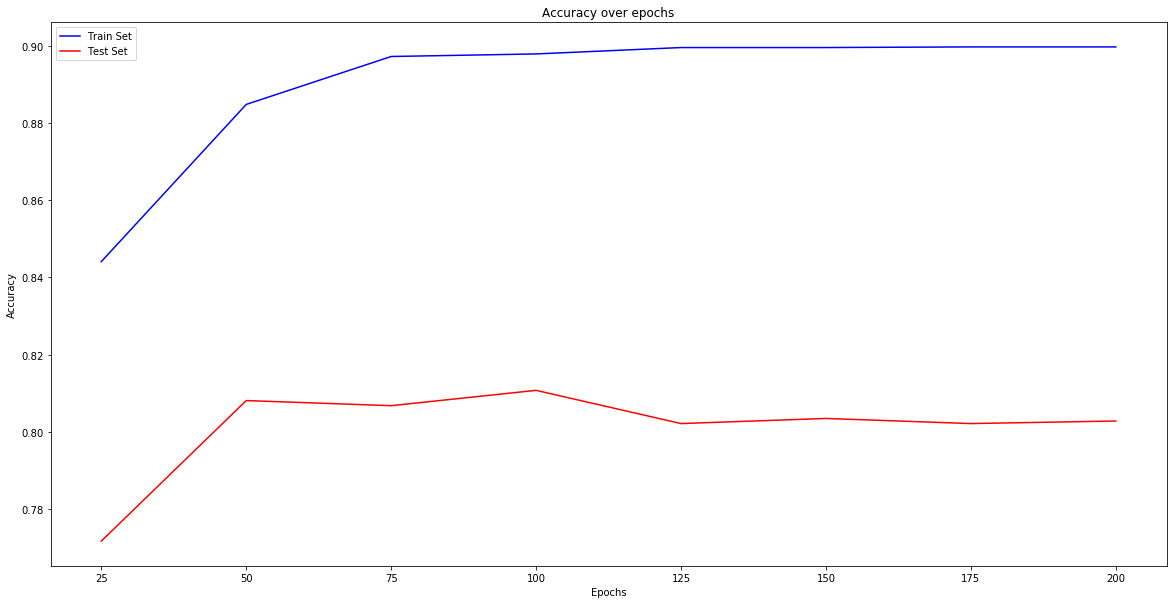

In [32]:
N_EPOCHS = 200
scores_train = []
scores_test = []

epoch = 25
while epoch <= N_EPOCHS:
    print('epoch: ', epoch)
    
    logistic_classifer3 = LogisticRegression(solver = 'lbfgs', max_iter = epoch, n_jobs = -1, multi_class = 'ovr', random_state = 42)
    logistic_classifer3.fit(X_train_pca, y_train)
    
    scores_train.append(logistic_classifer3.score(X_train_pca, y_train))
    scores_test.append(logistic_classifer3.score(X_test_pca, y_test))

    epoch += 25
    
epochs = np.linspace(25, 200, num = 8)
plt.figure(figsize=(20,10))
plt.plot(epochs, scores_train, 'b', label = 'Train Set')
plt.plot(epochs, scores_test, 'r', label = 'Test Set')
plt.title("Accuracy over epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()